# 1. Company profit prediction

Source: https://youtu.be/NUXdtN1W1FE <br>
Dataset: https://www.kaggle.com/munagalavijayakumar/profit-prediction

## a. Import the libraries

In [1]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

## b. Import the dataset

In [2]:
df = pd.read_csv('./data/1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X[:5, :]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [5]:
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

In [6]:
column_names = df.columns
display(column_names)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## c. Visualize data

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [8]:
# Check for missing value
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

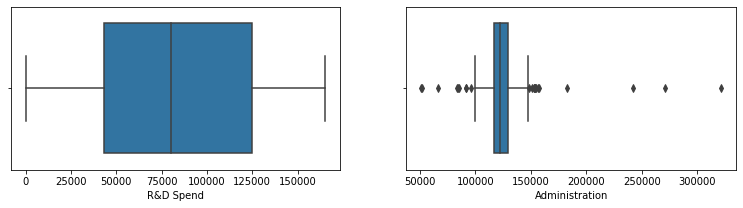

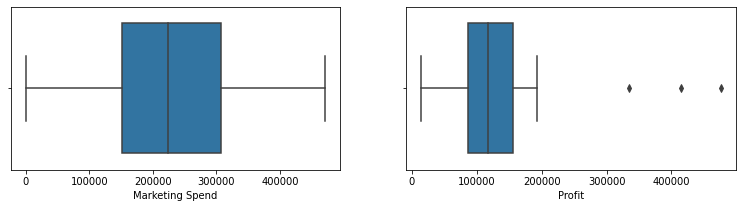

In [9]:
num_cols = ['R&D Spend','Administration','Marketing Spend','Profit']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

1.   R&D Spend is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
2.   Marketing Spend is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
3.   Administration is is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
4.   Profit is skewed ==> Needs transformation

<AxesSubplot:xlabel='State', ylabel='count'>

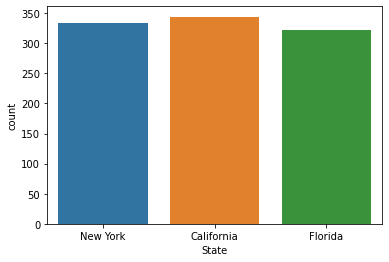

In [10]:
sns.countplot(x='State', data=df)

<AxesSubplot:>

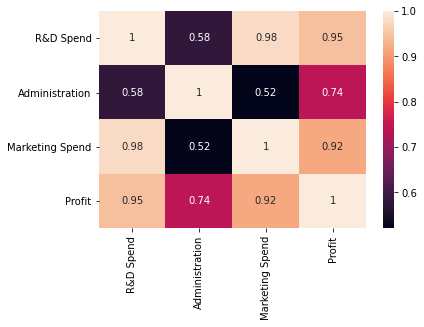

In [11]:
# Data Visualization
# Building correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

Correlation between some variables are high. <br>
We will need to analyze the VIF and drop some variables.

## d. Visualize relationships

Text(-14.950000000000003, 0.5, 'Profit')

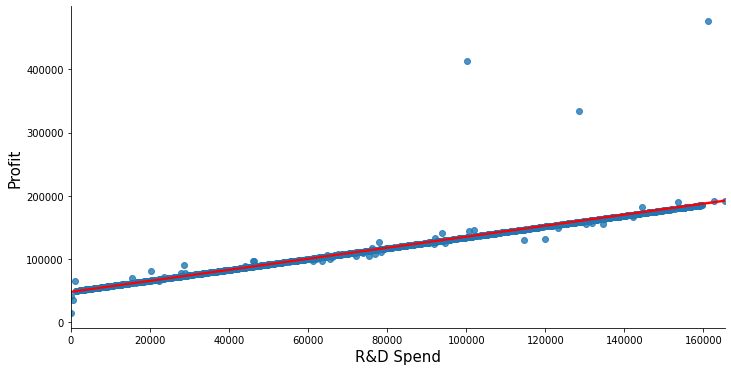

In [12]:
# Plot R&D Spend against Profit
sns.lmplot(x='R&D Spend', y='Profit', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('R&D Spend', fontsize=15)
plt.ylabel('Profit', fontsize=15)

R&D is clearly linearly-related to Profit.

Text(-14.950000000000003, 0.5, 'Profit')

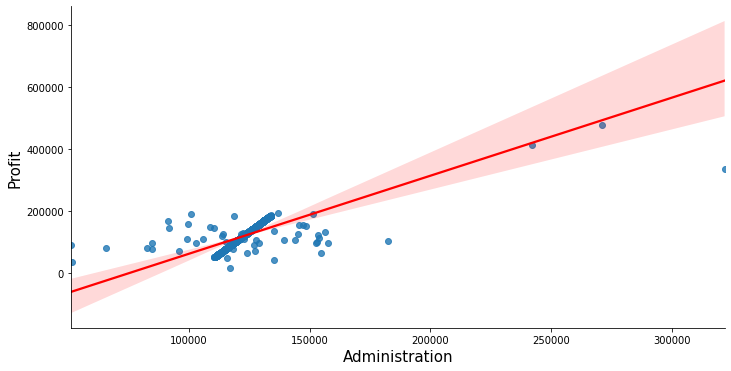

In [13]:
# Plot Administration against Profit
sns.lmplot(x='Administration', y='Profit', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('Administration', fontsize=15)
plt.ylabel('Profit', fontsize=15)

Administration is also linearly related to Profit.<br>
However, there are a significant number of anomalies.

Text(-14.950000000000003, 0.5, 'Profit')

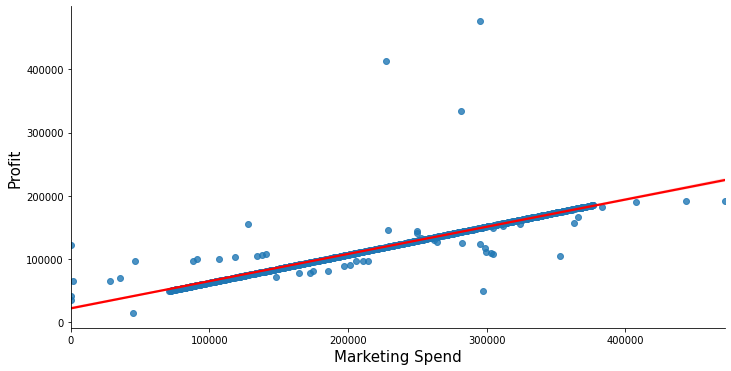

In [14]:
# Plot Marketing Spend against Profit
sns.lmplot(x='Marketing Spend', y='Profit', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('Marketing Spend', fontsize=15)
plt.ylabel('Profit', fontsize=15)

Marketing Spend is clearly linearly related to Profit.<br>

## e. Identify the best transformation

Text(0.5, 1.0, 'Profit (Boxcox)')

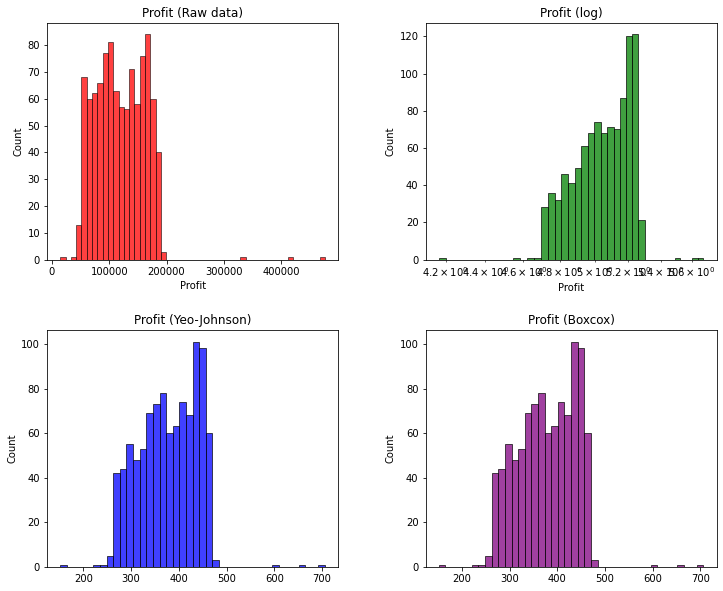

In [15]:
f= plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# Raw data
ax=f.add_subplot(2,2,1)
sns.histplot(df['Profit'],bins=50,color='red',ax=ax)
ax.set_title('Profit (Raw data)')

# Log transform
ax=f.add_subplot(2,2,2)
sns.histplot(np.log10(df['Profit']),bins=40,color='green',ax=ax)
ax.set_title('Profit (log)')
ax.set_xscale('log');

# Yeo-Johnson transform
from scipy import stats
profit, _ = stats.yeojohnson(df['Profit'])

ax=f.add_subplot(2,2,3)
sns.histplot(profit,bins=40,color='blue',ax=ax)
ax.set_title('Profit (Yeo-Johnson)')

# BoxCox transform
from scipy import stats
profit, _ = stats.boxcox(df['Profit'])

ax=f.add_subplot(2,2,4)
sns.histplot(profit,bins=40,color='purple',ax=ax)
ax.set_title('Profit (Boxcox)')

It seems even though our Profit data is skewed, any transformation will just worsen the skew
==> Use raw data

## f. Perform data pre-processing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('numerical', StandardScaler(), [0, 1, 2]),
        ('categorical', OneHotEncoder(drop='first'), [3])
    ]
)

In [18]:
X_train_encoded = np.array(X_preprocessor.fit_transform(X_train))
X_test_encoded = np.array(X_preprocessor.transform(X_test))

display(X_train_encoded[:5, :])

array([[ 1.14299433,  0.547713  ,  1.1206731 ,  0.        ,  0.        ],
       [-0.55700625, -0.34505277, -0.53952308,  0.        ,  1.        ],
       [ 1.66826251,  0.82356083,  1.63364248,  0.        ,  1.        ],
       [-0.29183975, -0.20579895, -0.28056529,  0.        ,  1.        ],
       [-0.69884251, -0.41953896, -0.67803834,  1.        ,  0.        ]])

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_encoded
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,R&D Spend,27.08
2,Marketing Spend,24.83
1,Administration,1.56
3,State,1.00
4,Profit,1.00


Since R&D Spend has the highest VIF that is >5, we drop it.

In [20]:
# Drop the column
column_names = column_names.drop('R&D Spend', errors='ignore')
X_train_encoded = np.delete(X_train_encoded, 0, axis=1)
X_test_encoded = np.delete(X_test_encoded, 0, axis=1)

# Test for VIF again
vif = pd.DataFrame()
X = X_train_encoded
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,Marketing Spend,1.32
0,Administration,1.31
2,State,1.00
3,Profit,1.00


All VIF < 5, we can proceed to the next step.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='drop',
    transformers=[
        ('numerical', StandardScaler(), [1, 2]),
        ('categorical', OneHotEncoder(drop='first'), [3])
    ]
)

X_preprocessor.fit_transform(X_train)

array([[ 0.547713  ,  1.1206731 ,  0.        ,  0.        ],
       [-0.34505277, -0.53952308,  0.        ,  1.        ],
       [ 0.82356083,  1.63364248,  0.        ,  1.        ],
       ...,
       [ 0.47619353,  0.98767478,  0.        ,  1.        ],
       [-0.35097484, -0.55053582,  0.        ,  0.        ],
       [-0.29462995, -0.44575631,  0.        ,  0.        ]])

## g. Build the model

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

LinearRegression()

In [23]:
# Print out the coefficient & the intercept
print(f"Coefficient = {regressor.coef_}")
print(f"Intercept = {regressor.intercept_}")

Coefficient = [17369.1613911  30617.84120176  -331.07194046   537.45612503]
Intercept = 120114.47996566455


## h. Evaluate the model

In [24]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []
        
# R2 score of train set
y_pred_train = regressor.predict(X_train_encoded)
R2_train_model = r2_score(y_train,y_pred_train)
R2_train.append(round(R2_train_model,2))

# R2 score of test set
y_pred_test = regressor.predict(X_test_encoded)
R2_test_model = r2_score(y_test,y_pred_test)
R2_test.append(round(R2_test_model,2))

# R2 mean of train set using Cross validation
ten_percent_data = int(df.shape[0]*0.1)
cross_val = cross_val_score(regressor, X_train_encoded, y_train, cv=ten_percent_data)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

# Printing results
print(f"Train R2-score = {round(R2_train_model,4) * 100}%")
print(f"Train CV mean = {round(cv_mean,4) * 100}%")
print(f"Test R2-score = {round(R2_test_model,4) * 100}%")

Train R2-score = 93.62%
Train CV mean = 93.43%
Test R2-score = 93.7%


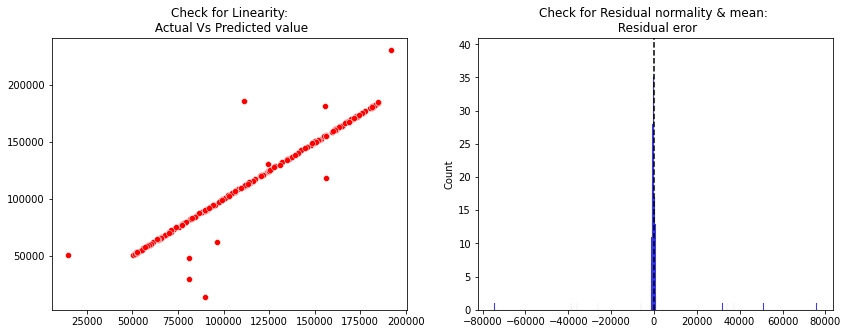

In [25]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_test, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_test), ax=ax, color='b')
ax.axvline((y_test - y_pred_test).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

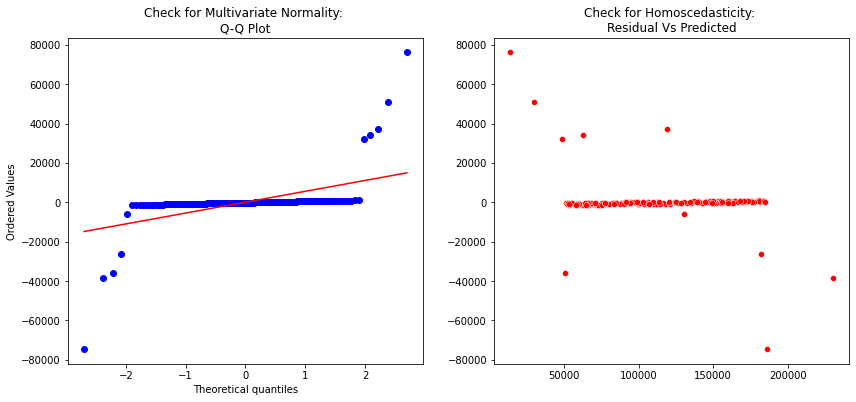

In [26]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_test),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_test), x= y_pred_test, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## i. Predict

In [27]:
data = [
    [200000.0, 200000.0, 200000.0, 'New York'],
    [600000.0, 0.0, 0.0, 'California'],
    [0.0, 600000.0, 0.0, 'Florida'],
    [0.0, 0.0, 600000.0, 'New York']
]

In [28]:
data_processed = X_preprocessor.transform(data)
y_pred = regressor.predict(data_processed)

display(y_pred)

array([ 214197.76960547, -120791.2756159 ,  680981.49971734,
         80997.10052445])

# 2. Old Car Selling Price

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## a. Import the libraries

In [29]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [30]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [31]:
df = pd.read_csv('./data/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## c. Visualize data

In [32]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
# Check for missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

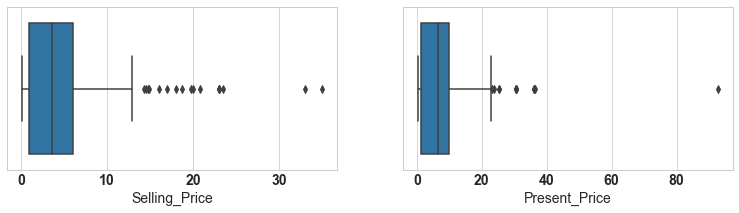

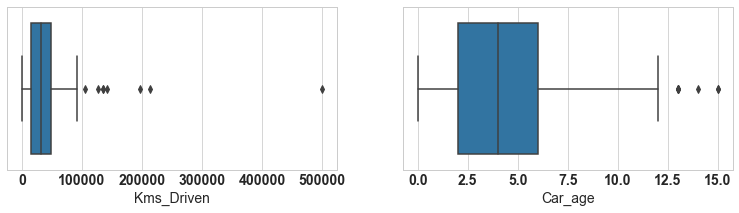

In [34]:
df['Car_age'] = 2018 - df['Year']

num_cols = ['Selling_Price','Present_Price','Kms_Driven','Car_age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

All are skewed ==> Needs transformation

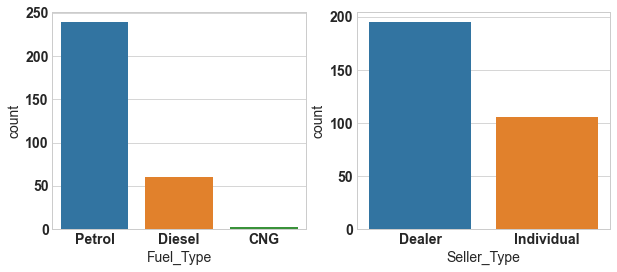

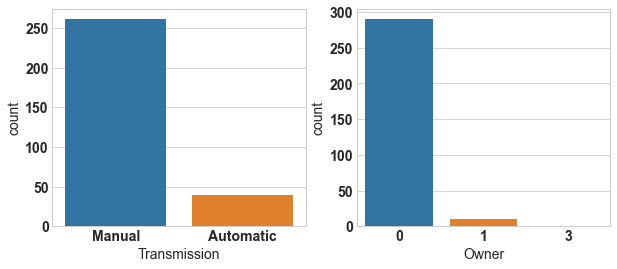

In [35]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

## d. Visualize relationships

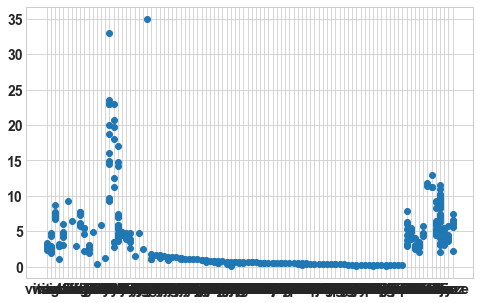

In [36]:
plt.scatter(df["Car_Name"].astype(str), df["Selling_Price"])
plt.show()

Car_Name doesn't seem to have any relationship with Selling_Price

Text(14.994999999999997, 0.5, 'Selling_Price')

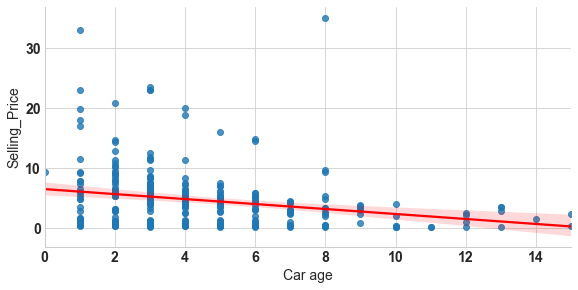

In [37]:
sns.lmplot(x='Car_age', y='Selling_Price', data=df, aspect=2, height=4, line_kws={'color': 'red'})  # aspect means how big you want the x-axis to be as compared to the y-axis

plt.xlabel('Car age')
plt.ylabel('Selling_Price')

Car_age seems to have a negative linear relationship with Selling_Price.

Text(14.994999999999997, 0.5, 'Selling_Price')

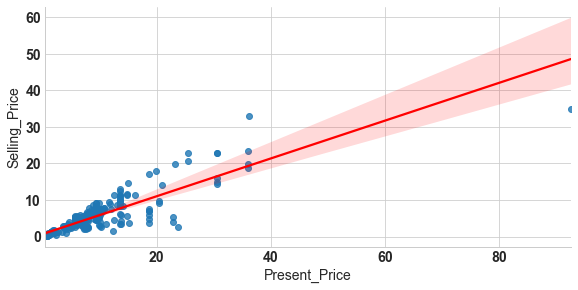

In [38]:
sns.lmplot(x='Present_Price', y='Selling_Price', data=df, aspect=2, height=4, line_kws={'color': 'red'})  # aspect means how big you want the x-axis to be as compared to the y-axis

plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')

Present_Price seems to have a positive linear relationship with Selling_Price

Text(14.994999999999997, 0.5, 'Selling_Price')

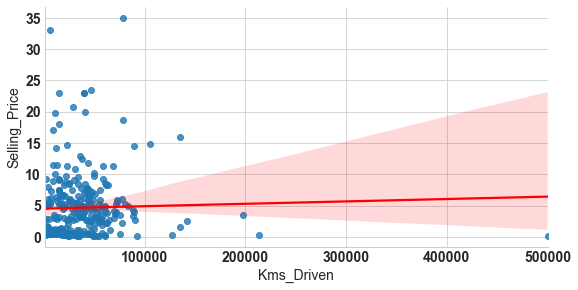

In [39]:
sns.lmplot(x='Kms_Driven', y='Selling_Price', data=df, aspect=2, height=4, line_kws={'color': 'red'})  # aspect means how big you want the x-axis to be as compared to the y-axis

plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')

Kms_Driven doesn't seem to have any relationship with Selling_Price

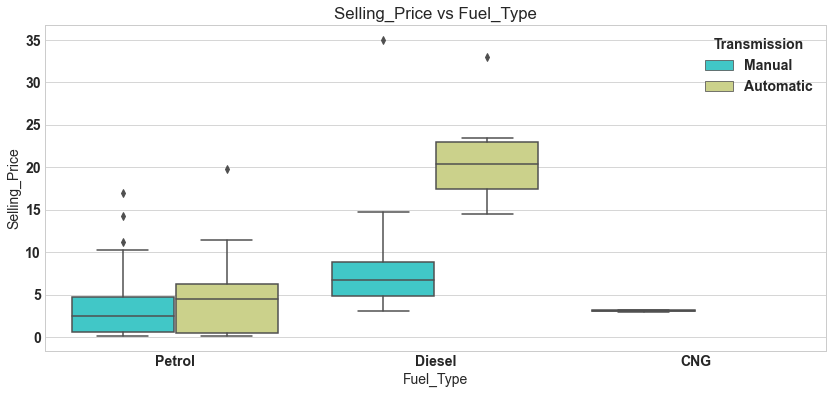

In [40]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Fuel_Type', y='Selling_Price',hue='Transmission',data=df,palette='rainbow')
plt.title('Selling_Price vs Fuel_Type');

For Petrol, it doesn't really matter the Transmission <br>
However, for Diessel, Automatic transmission actually sells for more

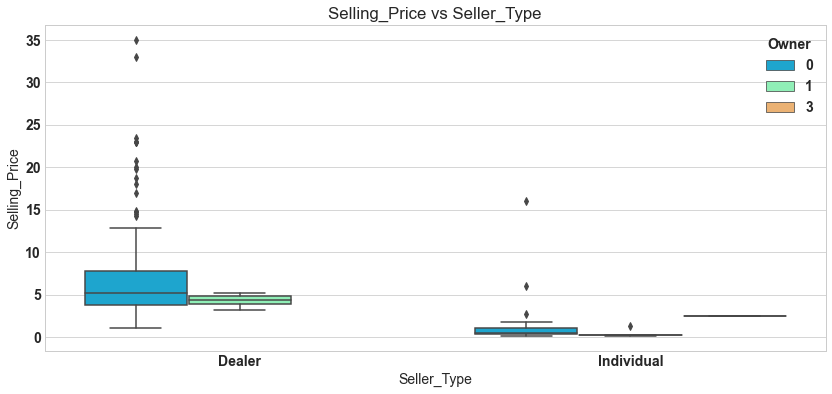

In [41]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Seller_Type', y='Selling_Price',hue='Owner',data=df,palette='rainbow')
plt.title('Selling_Price vs Seller_Type');

As an individual, it is less likely the car can sell high. <br>
Additionally, if it passes through more owners, it gets even cheaper.

<AxesSubplot:>

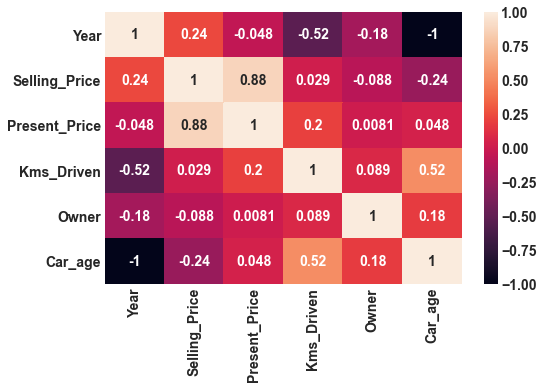

In [42]:
# Data Visualization
# Building correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

Correlation between some variables are high. <br>
We will need to analyze the VIF and drop some variables.

In [43]:
# Kms_Driven is correlated to Age
# The graph shows that Kms_driven is not linearly related to Selling_Price
# --> We should remove Kms_Driven

df.drop(['Car_Name','Year', 'Kms_Driven'], axis = 1, inplace=True)

## e. Identify the best transformation

Text(0.5, 1.0, 'Selling_Price (Boxcox)')

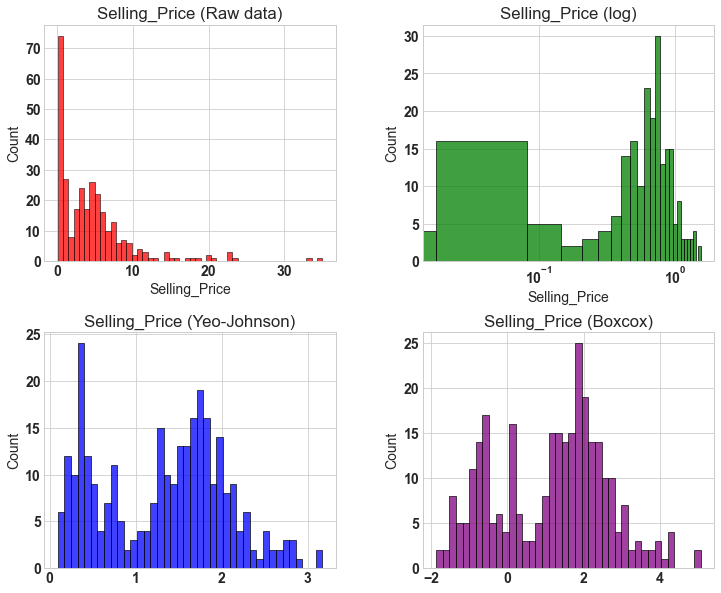

In [44]:
f= plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# Raw data
ax=f.add_subplot(2,2,1)
sns.histplot(df['Selling_Price'],bins=50,color='red',ax=ax)
ax.set_title('Selling_Price (Raw data)')

# Log transform
ax=f.add_subplot(2,2,2)
sns.histplot(np.log10(df['Selling_Price']),bins=40,color='green',ax=ax)
ax.set_title('Selling_Price (log)')
ax.set_xscale('log');

# Yeo-Johnson transform
from scipy import stats
Selling_Price, _ = stats.yeojohnson(df['Selling_Price'])

ax=f.add_subplot(2,2,3)
sns.histplot(Selling_Price,bins=40,color='blue',ax=ax)
ax.set_title('Selling_Price (Yeo-Johnson)')

# BoxCox transform
from scipy import stats
Selling_Price, _ = stats.boxcox(df['Selling_Price'])

ax=f.add_subplot(2,2,4)
sns.histplot(Selling_Price,bins=40,color='purple',ax=ax)
ax.set_title('Selling_Price (Boxcox)')

BoxCox seems to be the best choice here.

## f. Perform data pre-processing

In [45]:
# Dummy variable
categorical_columns = ['Fuel_Type','Seller_Type', 'Transmission', 'Owner']
df_encode = pd.get_dummies(data = df,
                           prefix = 'OHE', prefix_sep='_',
                           columns = categorical_columns,
                           drop_first = True,
                           dtype='int8')

In [46]:
df_encode.head()

,Selling_Price,Present_Price,Car_age,OHE_Diesel,OHE_Petrol,OHE_Individual,OHE_Manual,OHE_1,OHE_3
0,3.35,5.59,4,0,1,0,1,0,0
1,4.75,9.54,5,1,0,0,1,0,0
2,7.25,9.85,1,0,1,0,1,0,0
3,2.85,4.15,7,0,1,0,1,0,0
4,4.60,6.87,4,1,0,0,1,0,0


In [47]:
from scipy.stats import boxcox
y_bc,lam, ci = boxcox(df_encode['Selling_Price'],alpha=0.05)
df_encode['Selling_Price'] = y_bc

In [48]:
y_bc,lam, ci = boxcox(df_encode['Present_Price'],alpha=0.05)
df_encode['Present_Price'] = y_bc  

In [49]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_encode, test_size = 0.3, random_state = 25)

In [50]:
scaler = StandardScaler()
num_vars = ['Selling_Price','Present_Price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-50-f85bbd8ae0c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-50-f85bbd8ae0c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [51]:
X_train = df_train
y_train = df_train.pop('Selling_Price')

X_test = df_test
y_test = df_test.pop('Selling_Price')

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,OHE_Petrol,10.92
5,OHE_Manual,8.34
4,OHE_Individual,5.75
0,Present_Price,4.86
2,OHE_Diesel,4.31
1,Car_age,3.49
7,OHE_3,1.19
6,OHE_1,1.10


In [53]:
# Since OHE_Petrol > 5, it has high Multicolinearity and needs to be removed
X_train2 = X_train.drop('OHE_Petrol', axis=1)
X_test = X_test.drop('OHE_Petrol', axis=1)

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,OHE_Individual,4.36
0,Present_Price,4.07
4,OHE_Manual,3.10
1,Car_age,2.96
2,OHE_Diesel,1.87
6,OHE_3,1.18
5,OHE_1,1.09


Since all VIF < 5, we can move to the next step

## g. Build the model

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train2, y_train)

LinearRegression()

In [55]:
# Print out the coefficient & the intercept
print(f"Coefficient = {regressor.coef_}")
print(f"Intercept = {regressor.intercept_}")

Coefficient = [17369.1613911  30617.84120176  -331.07194046   537.45612503]
Intercept = 120114.47996566455


## h. Evaluate the model

In [56]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []
        
# R2 score of train set
y_pred_train = lin_reg.predict(X_train2)
R2_train_model = r2_score(y_train,y_pred_train)
R2_train.append(round(R2_train_model,2))

# R2 score of test set
y_pred_test = lin_reg.predict(X_test)
R2_test_model = r2_score(y_test,y_pred_test)
R2_test.append(round(R2_test_model,2))

# R2 mean of train set using Cross validation
cross_val = cross_val_score(lin_reg, X_train ,y_train , cv=5)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

# Printing results
print(f"Train R2-score = {round(R2_train_model,4) * 100}%")
print(f"Train CV mean = {round(cv_mean,4) * 100}%")
print(f"Test R2-score = {round(R2_test_model,4) * 100}%")

Train R2-score = 97.76%
Train CV mean = 96.97%
Test R2-score = 96.35000000000001%


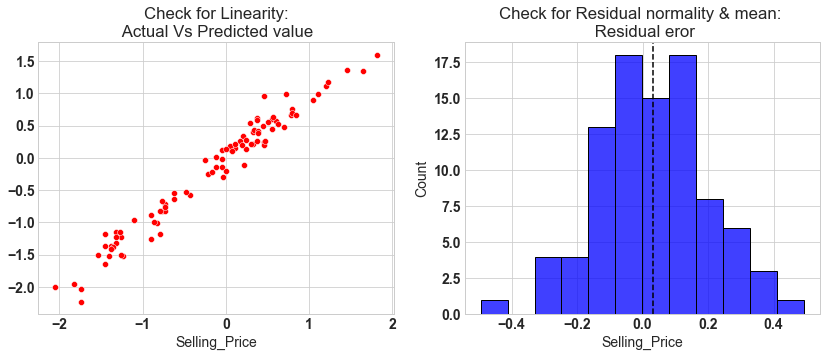

In [57]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_test, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_test), ax=ax, color='b')
ax.axvline((y_test - y_pred_test).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

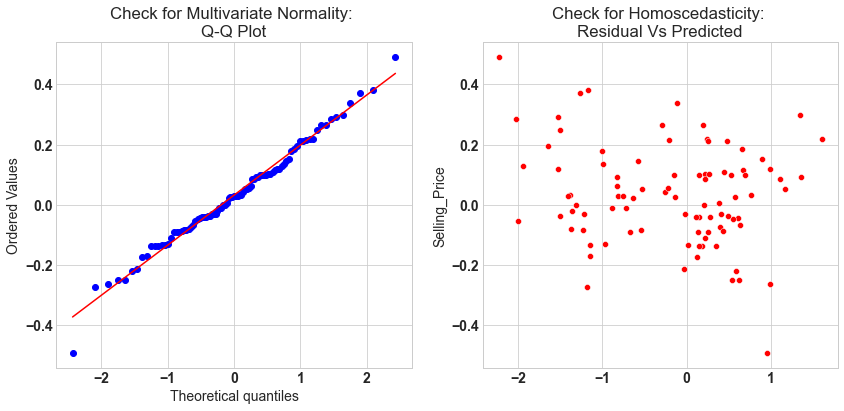

In [58]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_test),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_test), x= y_pred_test, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## i. Predict

In [59]:
data = [
    [200000.0, 200000.0, 200000.0, 'New York'],
    [600000.0, 0.0, 0.0, 'California'],
    [0.0, 600000.0, 0.0, 'Florida'],
    [0.0, 0.0, 600000.0, 'New York']
]

In [60]:
data_processed = X_preprocessor.transform(data)
y_pred = regressor.predict(data_processed)

display(y_pred)

array([ 214197.76960547, -120791.2756159 ,  680981.49971734,
         80997.10052445])

# 3. Insurance expense

Dataset: https://www.kaggle.com/awaiskaggler/insurance-csv

## a. Import the libraries

In [61]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

In [62]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## b. Import the dataset

In [89]:
df = pd.read_csv('./data/insurance.csv')
print(f'\nNumber of rows and columns in the data set: {df.shape}\n')

df.head()


Number of rows and columns in the data set: (1338, 7)



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## c. Visualize data

In [90]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [91]:
# Check for missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

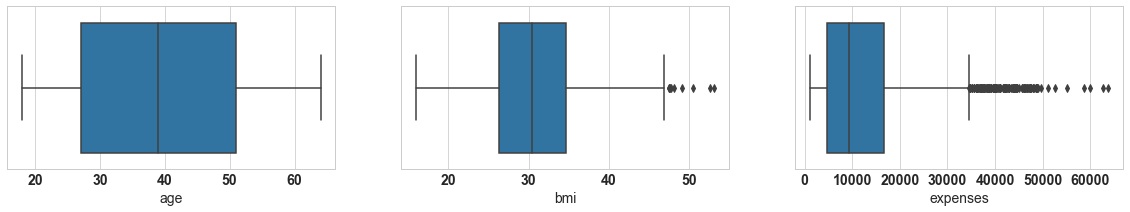

In [92]:
num_cols = ['age','bmi','expenses']
fig = plt.figure(figsize=[20,3])

plt.subplot(1,3,1)
sns.boxplot(x=num_cols[0], data=df)

plt.subplot(1,3,2)
sns.boxplot(x=num_cols[1], data=df)

plt.subplot(1,3,3)
sns.boxplot(x=num_cols[2], data=df)

plt.show()

1.   age is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
2.   bmi is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
3.   expenses is skewed ==> Needs transformation

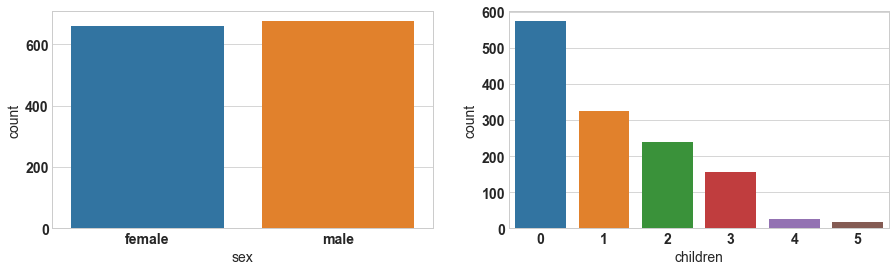

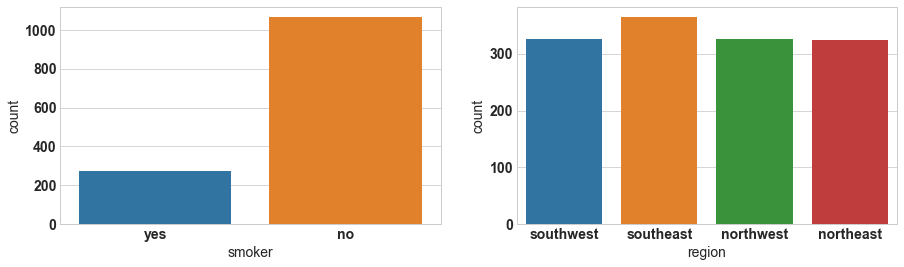

In [93]:
cat_cols = ['sex','children','smoker','region']
i=0
while i < 4:
    fig = plt.figure(figsize=[15,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

<AxesSubplot:>

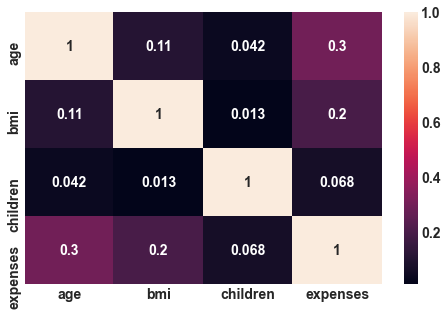

In [94]:
# Data Visualization
# Building correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

Correlation between variables are low. <br>
Most likely, we do not need to use the VIF to remove any variable.

## d. Visualize relationships

Text(-8.629999999999995, 0.5, 'expenses')

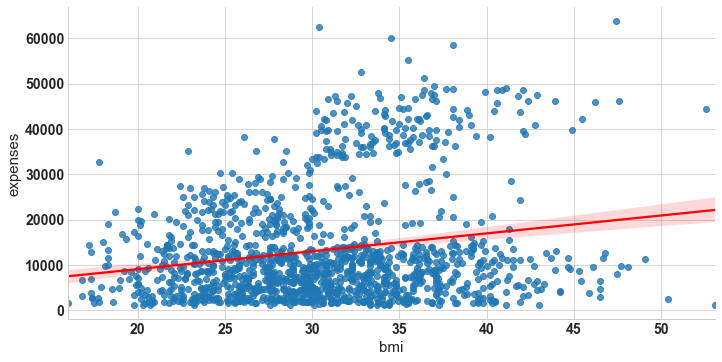

In [95]:
# Plot bmi against expenses
sns.lmplot(x='bmi', y='expenses', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('bmi', fontsize=15)
plt.ylabel('expenses', fontsize=15)

bmi seems related to expenses, but it is not linear.

Text(-8.629999999999995, 0.5, 'expenses')

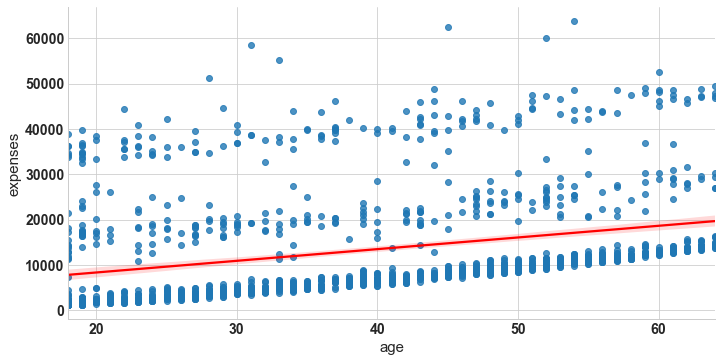

In [96]:
# Plot age against expenses
sns.lmplot(x='age', y='expenses', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('age', fontsize=15)
plt.ylabel('expenses', fontsize=15)

age seems to have a strong positive linear relationship with expenses.

Text(0.5, 1.0, 'Scatter plot of bmi vs expenses')

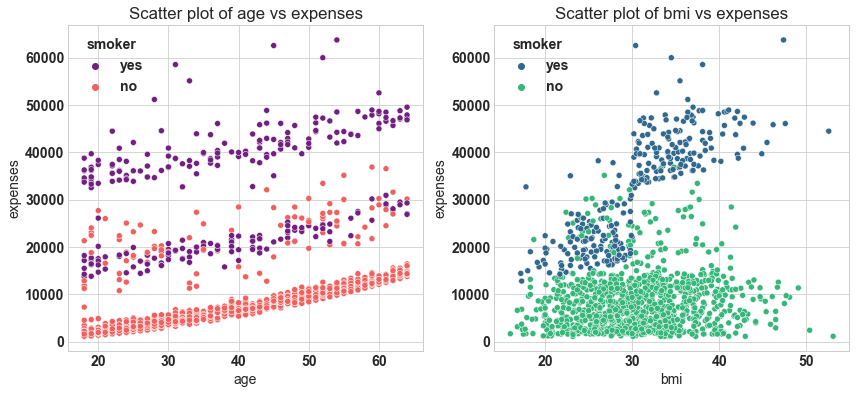

In [97]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(1,2,1)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of age vs expenses')

ax = f.add_subplot(1,2,2)
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of bmi vs expenses')

Smoker also seems to have positive relationship with expenses.

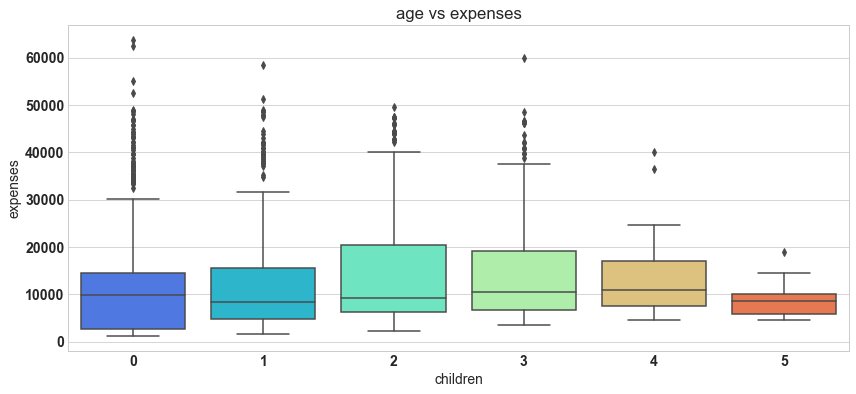

In [98]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='expenses',data=df,palette='rainbow')
plt.title('age vs expenses');

It seems those who have 4 to 5 children have significantly less expenses on average

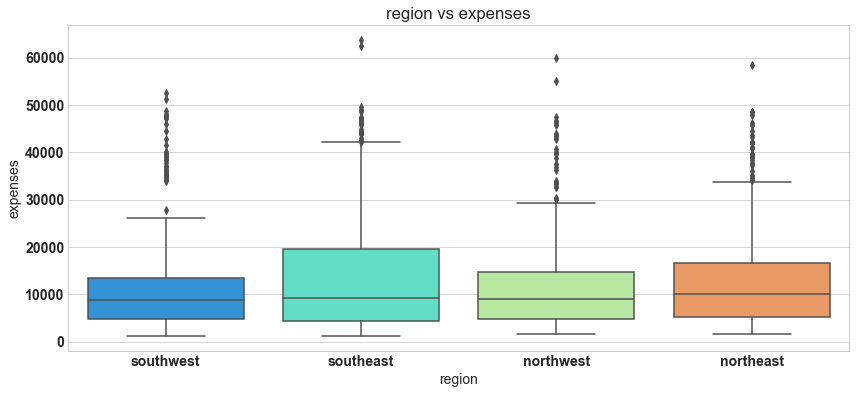

In [99]:
plt.figure(figsize=(14,6))
sns.boxplot(x='region', y='expenses',data=df,palette='rainbow')
plt.title('region vs expenses');

It seems those who come from the western regions have (southwest & northwest) have less expenses on average

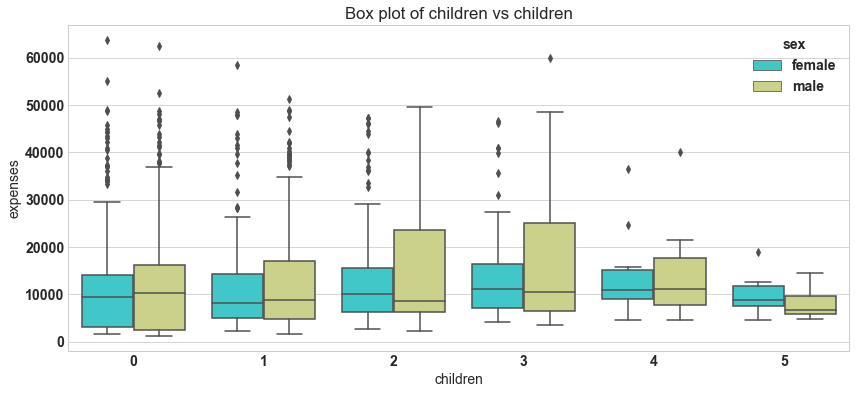

In [100]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='expenses',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of children vs children');

It seems from those who have the same number of children, female have significantly less expenses on average

## e. Identify the best transformation

Text(0.5, 1.0, 'expenses (Boxcox)')

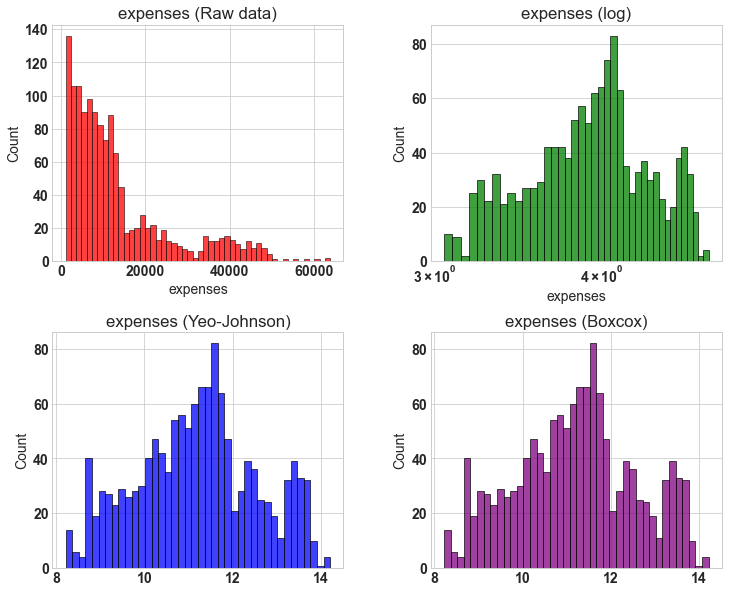

In [101]:
f= plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# Raw data
ax=f.add_subplot(2,2,1)
sns.histplot(df['expenses'],bins=50,color='red',ax=ax)
ax.set_title('expenses (Raw data)')

# Log transform
ax=f.add_subplot(2,2,2)
sns.histplot(np.log10(df['expenses']),bins=40,color='green',ax=ax)
ax.set_title('expenses (log)')
ax.set_xscale('log');

# Yeo-Johnson transform
from scipy import stats
expenses, _ = stats.yeojohnson(df['expenses'])

ax=f.add_subplot(2,2,3)
sns.histplot(expenses,bins=40,color='blue',ax=ax)
ax.set_title('expenses (Yeo-Johnson)')

# BoxCox transform
from scipy import stats
expenses, _ = stats.boxcox(df['expenses'])

ax=f.add_subplot(2,2,4)
sns.histplot(expenses,bins=40,color='purple',ax=ax)
ax.set_title('expenses (Boxcox)')

It seems log, Yeo-Johnson, and BoxCox produce similar results <br>
=> For the sake of simplicity, we use log tranform.

## f. Perform data pre-processing

In [102]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df,
                           columns = categorical_columns,
                           drop_first = True,
                           dtype='int8')

In [103]:
df_encode.head()

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0


In [104]:
# Log transform
df_encode['expenses'] = np.log(df_encode['expenses'])

In [105]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_encode, test_size = 0.2, random_state = 1)

In [106]:
scaler = StandardScaler()
num_vars = ['age','bmi', 'expenses']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-106-02f6b97193f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-106-02f6b97193f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [107]:
X_train = df_train
y_train = df_train.pop('expenses')

X_test = df_test
y_test = df_test.pop('expenses')

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,sex_male,1.76
10,region_southeast,1.51
9,region_northwest,1.42
3,children_1,1.41
11,region_southwest,1.39
4,children_2,1.30
8,smoker_yes,1.24
5,children_3,1.20
1,bmi,1.10
7,children_5,1.04


Since all VIF < 5, we can move to the next step

In [109]:
X_train2 = X_train.drop(['bmi', 'children_1', 'children_2', 'children_3', 'region_southeast'], axis=1)
X_test = X_test.drop(['bmi', 'children_1', 'children_2', 'children_3', 'region_southeast'], axis=1)

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,sex_male,1.43
6,region_southwest,1.19
4,smoker_yes,1.18
5,region_northwest,1.17
2,children_4,1.02
3,children_5,1.02
0,age,1.00


## g. Build the model

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2, y_train)

LinearRegression()

In [111]:
# Print out the coefficient & the intercept
print(f"Coefficient = {regressor.coef_}")
print(f"Intercept = {regressor.intercept_}")

Coefficient = [ 0.53708394 -0.08361713  0.39828065  0.30376999  1.69646085  0.01900431
 -0.05456128]
Intercept = -0.30849367922089127


## h. Evaluate the model

In [112]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []
        
# R2 score of train set
y_pred_train = regressor.predict(X_train2)
R2_train_model = r2_score(y_train,y_pred_train)
R2_train.append(round(R2_train_model,2))

# R2 score of test set
y_pred_test = regressor.predict(X_test)
R2_test_model = r2_score(y_test,y_pred_test)
R2_test.append(round(R2_test_model,2))

# R2 mean of train set using Cross validation
cross_val = cross_val_score(regressor, X_train2, y_train, cv=5)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

# Printing results
print(f"Train R2-score = {round(R2_train_model,4) * 100}%")
print(f"Train CV mean = {round(cv_mean,4) * 100}%")
print(f"Test R2-score = {round(R2_test_model,4) * 100}%")

Train R2-score = 74.2%
Train CV mean = 73.56%
Test R2-score = 76.1%


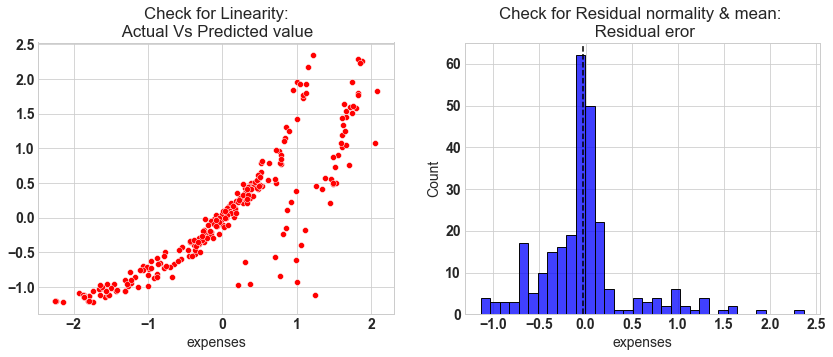

In [113]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_test, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_test), ax=ax, color='b')
ax.axvline((y_test - y_pred_test).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

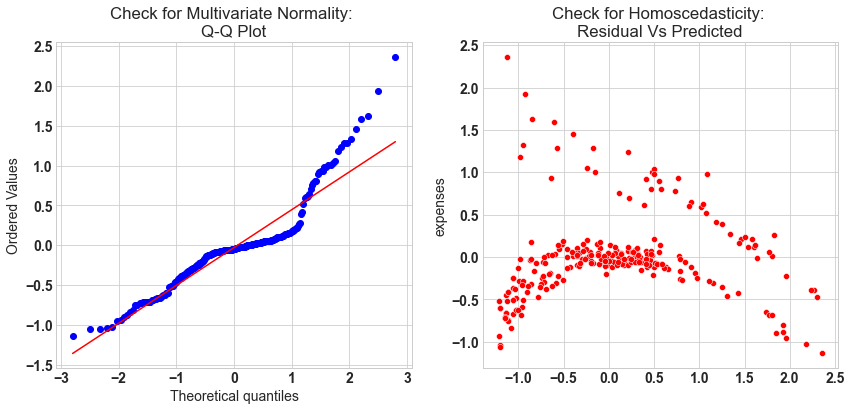

In [114]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_test),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_test), x= y_pred_test, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Predict

In [ ]:
# data = [
#     [200000.0, 200000.0, 200000.0, 'New York'],
#     [600000.0, 0.0, 0.0, 'California'],
#     [0.0, 600000.0, 0.0, 'Florida'],
#     [0.0, 0.0, 600000.0, 'New York']
# ]

In [ ]:
# data_processed = X_preprocessor.transform(data)
# y_pred = regressor.predict(data_processed)

# display(y_pred)